# Libraries

In [100]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [101]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    
    return img

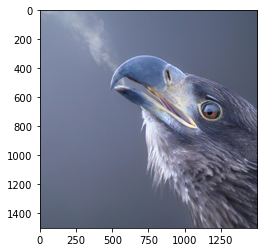

In [102]:
filename = "C:\\Users\\AL3MD\\Desktop\\001.jpg" #--> path of image
org_img = read_file(filename)
img = read_file(filename)

plt.imshow(img)
plt.show()



# Create Edge Mask

In [103]:
def edge_mask(img, line_size, blur_value):
    """""
    input: Scale Image
    output: Edges of Images
    """""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    gray_blur = cv2.medianBlur(gray,blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C ,
    cv2.THRESH_BINARY, line_size, blur_value )

    return edges

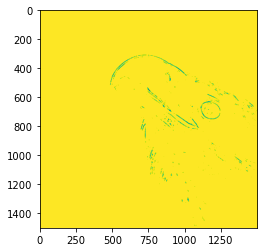

In [104]:
line_size , blur_value = 5,7

edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges )
plt.show()

# Reduce the Color Palette

In [105]:
def color_quantization(img, k):

    # Transform the image
    data = np.float32(img).reshape((-1,3))

    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    ## Implementing K-Means

    ret , label , center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

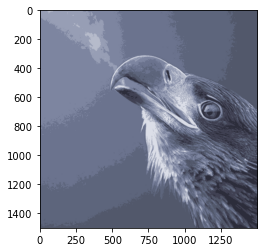

In [106]:
img = color_quantization(img,k=9)

plt.imshow(img)
plt.show()

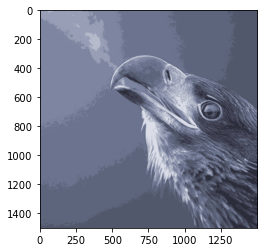

In [107]:
# Reduce the noise

blurred = cv2.bilateralFilter(img,d= 3 , sigmaColor= 200 , sigmaSpace= 200)

plt.imshow(blurred)
plt.show()

# combine Edge Mask with the quantiz img

In [108]:
def cartoon():
    c = cv2.bitwise_and(blurred , blurred , mask= edges)

    plt.imshow(c)
    plt.title("cartoon_img")
    plt.show()

    plt.imshow(org_img)
    plt.title("orignal_img")
    plt.show()


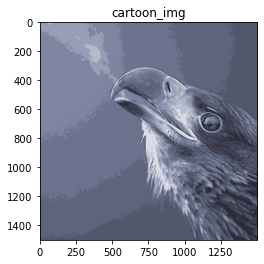

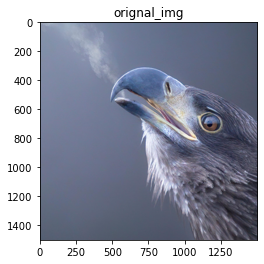

In [109]:
cartoon()